### **Data Preparation**

In [1]:
import pandas as pd

In [3]:
from google.colab import files
uploaded = files.upload()

Saving train_preprocess.tsv.txt to train_preprocess.tsv.txt


In [4]:
df = pd.read_csv('train_preprocess.tsv.txt', sep='\t', names = ['content', 'sentiment'])
df.head(10)

,content,sentiment
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral
2,lokasi strategis di jalan sumatera bandung . t...,positive
3,betapa bahagia nya diri ini saat unboxing pake...,positive
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative
5,"makanan beragam , harga makanan di food stall ...",positive
6,pakai kartu kredit bca tidak untung malah rugi...,negative
7,"tempat unik , bagus buat foto , makanan enak ,...",positive
8,saya bersama keluarga baru saja menikmati peng...,positive
9,bersyukur,positive


In [5]:
df.shape

(11000, 2)

In [6]:
df.sentiment.value_counts()

positive    6416
negative    3436
neutral     1148
Name: sentiment, dtype: int64

### **Cleansing Dataset**

In [7]:
import re

def cleansing(sent):
    string = sent.lower()
    string = re.sub(r'[^a-z0-9A-Z]', ' ', string)
    return string

In [8]:
df['content_clean'] = df.content.apply(cleansing)

In [9]:
df.head(10)

,content,sentiment,content_clean
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive,warung ini dimiliki oleh pengusaha pabrik tahu...
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral,mohon ulama lurus dan k212 mmbri hujjah partai...
2,lokasi strategis di jalan sumatera bandung . t...,positive,lokasi strategis di jalan sumatera bandung t...
3,betapa bahagia nya diri ini saat unboxing pake...,positive,betapa bahagia nya diri ini saat unboxing pake...
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative,duh jadi mahasiswa jangan sombong dong kas...
5,"makanan beragam , harga makanan di food stall ...",positive,makanan beragam harga makanan di food stall ...
6,pakai kartu kredit bca tidak untung malah rugi...,negative,pakai kartu kredit bca tidak untung malah rugi...
7,"tempat unik , bagus buat foto , makanan enak ,...",positive,tempat unik bagus buat foto makanan enak ...
8,saya bersama keluarga baru saja menikmati peng...,positive,saya bersama keluarga baru saja menikmati peng...
9,bersyukur,positive,bersyukur


In [10]:
neg = df.loc[df['sentiment'] == 'negative'].content_clean.tolist()
neu = df.loc[df['sentiment'] == 'neutral'].content_clean.tolist()
pos = df.loc[df['sentiment'] == 'positive'].content_clean.tolist()

neg_sentiment = df.loc[df['sentiment'] == 'negative'].sentiment.tolist()
neu_sentiment = df.loc[df['sentiment'] == 'neutral'].sentiment.tolist()
pos_sentiment = df.loc[df['sentiment'] == 'positive'].sentiment.tolist()

In [11]:
total_data = pos + neu + neg
sentiments = pos_sentiment + neu_sentiment + neg_sentiment

print("Pos: %s, Neu: %s, Neg: %s" % (len(pos), len(neu), len(neg)))
print("Total data: %s" % len(total_data))

Pos: 6416, Neu: 1148, Neg: 3436
Total data: 11000


### **Feature Extraction**

In [12]:
import pickle
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from collections import defaultdict

max_features = 100000
tokenizer = Tokenizer(num_words=max_features, split=' ', lower=True)
tokenizer.fit_on_texts(total_data)
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)
    print("tokenizer.pickle has created!")

X = tokenizer.texts_to_sequences(total_data)

vocab_size = len(tokenizer.word_index)
maxlen = max(len(x) for x in X)

X = pad_sequences(X)
with open('x_pad_sequences.pickle', 'wb') as handle:
    pickle.dump(X, handle, protocol=pickle.HIGHEST_PROTOCOL)
    print("x_pad_sequences.pickle has created!")

tokenizer.pickle has created!
x_pad_sequences.pickle has created!


In [15]:
Y = pd.get_dummies(sentiments)
Y = Y.values

with open('y_labels.pickle', 'wb') as handle:
    pickle.dump(Y, handle, protocol=pickle.HIGHEST_PROTOCOL)
    print("y_labels.pickle has created!")

y_labels.pickle has created!


In [17]:
Y

array([[0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       ...,
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]], dtype=uint8)

In [18]:
sentiments

['positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',

### **Split Dataset**

In [19]:
from sklearn.model_selection import train_test_split

file = open("x_pad_sequences.pickle",'rb')
X = pickle.load(file)
file.close()

file = open("y_labels.pickle",'rb')
Y = pickle.load(file)
file.close()

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

### **Training**

In [21]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, SimpleRNN, Activation
from keras import optimizers
from keras.callbacks import EarlyStopping, TensorBoard
from keras.layers import Flatten
from keras import backend as K

In [22]:
import sys

# Check if a virtual environment is active
is_virtualenv = hasattr(sys, 'real_prefix') or (hasattr(sys, 'base_prefix') and sys.base_prefix != sys.prefix)

if is_virtualenv:
    print("A virtual environment is active.")
else:
    print("No virtual environment is active.")

No virtual environment is active.


In [23]:
import numpy as np
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, SimpleRNN, Activation
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from tensorflow.keras.layers import Flatten
from tensorflow.keras import backend as K

In [24]:
embed_dim = 100
units = 64

model = Sequential()
model.add(Embedding(max_features, embed_dim, input_length=X.shape[1]))
model.add(LSTM(units, dropout=0.2))
model.add(Dense(3,activation='softmax'))
model.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

adam = optimizers.Adam(lr = 0.0001)
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)
history = model.fit(X_train, y_train, epochs=10, batch_size=10, validation_data=(X_test, y_test), verbose=1, callbacks=[es])
# history = model.fit(X_train, y_train, epochs=10, batch_size=10, validation_data=(X_test, y_test), verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 96, 100)           10000000  
                                                                 
 lstm (LSTM)                 (None, 64)                42240     
                                                                 
 dense (Dense)               (None, 3)                 195       
                                                                 
Total params: 10042435 (38.31 MB)
Trainable params: 10042435 (38.31 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


None
Epoch 1/10
880/880 [==============================] - 283s 315ms/step - loss: 0.4501 - accuracy: 0.8215 - val_loss: 0.3270 - val_accuracy: 0.8773
Epoch 2/10
880/880 [==============================] - 259s 294ms/step - loss: 0.1947 - accuracy: 0.9292 - val_loss: 0.3309 - val_accuracy: 0.8782
Epoch 3/10
880/880 [==============================] - 259s 294ms/step - loss: 0.1096 - accuracy: 0.9563 - val_loss: 0.3897 - val_accuracy: 0.8682
Epoch 3: early stopping


### **Evaluation**

In [25]:
from sklearn import metrics

predictions = model.predict(X_test)
y_pred = predictions
matrix_test = metrics.classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1))
print("Testing selesai")
print(matrix_test)

69/69 [==============================] - 2s 17ms/step
Testing selesai
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       685
           1       0.87      0.69      0.77       233
           2       0.90      0.92      0.91      1282

    accuracy                           0.87      2200
   macro avg       0.86      0.81      0.83      2200
weighted avg       0.87      0.87      0.87      2200



### **Cross Validation**

In [26]:
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

kf = KFold(n_splits=5,random_state=42,shuffle=True)

accuracies = []

y = Y

embed_dim = 100
units = 64

for iteration, data in enumerate(kf.split(X), start=1):

    data_train   = X[data[0]]
    target_train = y[data[0]]

    data_test    = X[data[1]]
    target_test  = y[data[1]]

    model = Sequential()
    model.add(Embedding(max_features, embed_dim, input_length=X.shape[1]))
    model.add(LSTM(units, dropout=0.5))
    model.add(Dense(3,activation='softmax'))
    sgd = optimizers.Adam(learning_rate= 0.0001)
    model.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = ['accuracy'])

    adam = optimizers.Adam(lr = 0.0001)
    model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])

    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)
    history = model.fit(X_train, y_train, epochs=10, batch_size=10, validation_data=(X_test, y_test), verbose=1, callbacks=[es])

    predictions = model.predict(X_test)
    y_pred = predictions

    # for the current fold only
    accuracy = accuracy_score(y_test.argmax(axis=1), y_pred.argmax(axis=1))

    print("Training ke-", iteration)
    print(classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1)))
    print("======================================================")

    accuracies.append(accuracy)

# this is the average accuracy over all folds
average_accuracy = np.mean(accuracies)

print()
print()
print()
print("Rata-rata Accuracy: ", average_accuracy)

Epoch 1/10
880/880 [==============================] - 261s 292ms/step - loss: 0.4664 - accuracy: 0.8114 - val_loss: 0.3614 - val_accuracy: 0.8636
Epoch 2/10
880/880 [==============================] - 256s 291ms/step - loss: 0.2194 - accuracy: 0.9180 - val_loss: 0.3422 - val_accuracy: 0.8777
Epoch 3/10
880/880 [==============================] - 257s 293ms/step - loss: 0.1334 - accuracy: 0.9516 - val_loss: 0.3659 - val_accuracy: 0.8732
Epoch 4/10
880/880 [==============================] - 256s 291ms/step - loss: 0.0881 - accuracy: 0.9642 - val_loss: 0.4240 - val_accuracy: 0.8750
Epoch 4: early stopping
69/69 [==============================] - 2s 18ms/step
Training ke- 1
              precision    recall  f1-score   support

           0       0.85      0.81      0.83       685
           1       0.75      0.79      0.77       233
           2       0.91      0.92      0.92      1282

    accuracy                           0.88      2200
   macro avg       0.84      0.84      0.84      22

Epoch 1/10
880/880 [==============================] - 258s 291ms/step - loss: 0.4768 - accuracy: 0.8109 - val_loss: 0.3416 - val_accuracy: 0.8745
Epoch 2/10
880/880 [==============================] - 254s 288ms/step - loss: 0.2300 - accuracy: 0.9150 - val_loss: 0.3413 - val_accuracy: 0.8768
Epoch 3/10
880/880 [==============================] - 253s 287ms/step - loss: 0.1370 - accuracy: 0.9490 - val_loss: 0.3769 - val_accuracy: 0.8691
Epoch 4/10
880/880 [==============================] - 255s 289ms/step - loss: 0.0902 - accuracy: 0.9641 - val_loss: 0.4306 - val_accuracy: 0.8673
Epoch 4: early stopping
69/69 [==============================] - 2s 22ms/step
Training ke- 2
              precision    recall  f1-score   support

           0       0.85      0.78      0.81       685
           1       0.75      0.80      0.78       233
           2       0.90      0.93      0.91      1282

    accuracy                           0.87      2200
   macro avg       0.83      0.83      0.83      22

Epoch 1/10
880/880 [==============================] - 250s 281ms/step - loss: 0.4586 - accuracy: 0.8168 - val_loss: 0.3726 - val_accuracy: 0.8623
Epoch 2/10
880/880 [==============================] - 247s 280ms/step - loss: 0.2185 - accuracy: 0.9170 - val_loss: 0.3450 - val_accuracy: 0.8664
Epoch 3/10
880/880 [==============================] - 250s 284ms/step - loss: 0.1304 - accuracy: 0.9516 - val_loss: 0.3551 - val_accuracy: 0.8732
Epoch 4/10
880/880 [==============================] - 248s 282ms/step - loss: 0.0867 - accuracy: 0.9664 - val_loss: 0.4147 - val_accuracy: 0.8718
Epoch 4: early stopping
69/69 [==============================] - 3s 23ms/step
Training ke- 3
              precision    recall  f1-score   support

           0       0.81      0.84      0.83       685
           1       0.78      0.79      0.79       233
           2       0.92      0.90      0.91      1282

    accuracy                           0.87      2200
   macro avg       0.84      0.85      0.84      22

Epoch 1/10
880/880 [==============================] - 260s 294ms/step - loss: 0.4758 - accuracy: 0.8048 - val_loss: 0.3277 - val_accuracy: 0.8859
Epoch 2/10
880/880 [==============================] - 259s 294ms/step - loss: 0.2259 - accuracy: 0.9187 - val_loss: 0.3282 - val_accuracy: 0.8836
Epoch 3/10
880/880 [==============================] - 258s 293ms/step - loss: 0.1377 - accuracy: 0.9476 - val_loss: 0.3485 - val_accuracy: 0.8777
Epoch 3: early stopping
69/69 [==============================] - 2s 18ms/step
Training ke- 4
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       685
           1       0.81      0.83      0.82       233
           2       0.91      0.91      0.91      1282

    accuracy                           0.88      2200
   macro avg       0.85      0.86      0.85      2200
weighted avg       0.88      0.88      0.88      2200



Epoch 1/10
880/880 [==============================] - 257s 290ms/step - loss: 0.4852 - accuracy: 0.8073 - val_loss: 0.3374 - val_accuracy: 0.8727
Epoch 2/10
880/880 [==============================] - 256s 291ms/step - loss: 0.2313 - accuracy: 0.9173 - val_loss: 0.3344 - val_accuracy: 0.8841
Epoch 3/10
880/880 [==============================] - 255s 289ms/step - loss: 0.1403 - accuracy: 0.9500 - val_loss: 0.3528 - val_accuracy: 0.8741
Epoch 4/10
880/880 [==============================] - 255s 290ms/step - loss: 0.0870 - accuracy: 0.9668 - val_loss: 0.4173 - val_accuracy: 0.8786
Epoch 4: early stopping
69/69 [==============================] - 2s 18ms/step
Training ke- 5
              precision    recall  f1-score   support

           0       0.87      0.79      0.83       685
           1       0.82      0.78      0.80       233
           2       0.89      0.94      0.92      1282

    accuracy                           0.88      2200
   macro avg       0.86      0.84      0.85      22

### **Visualization**

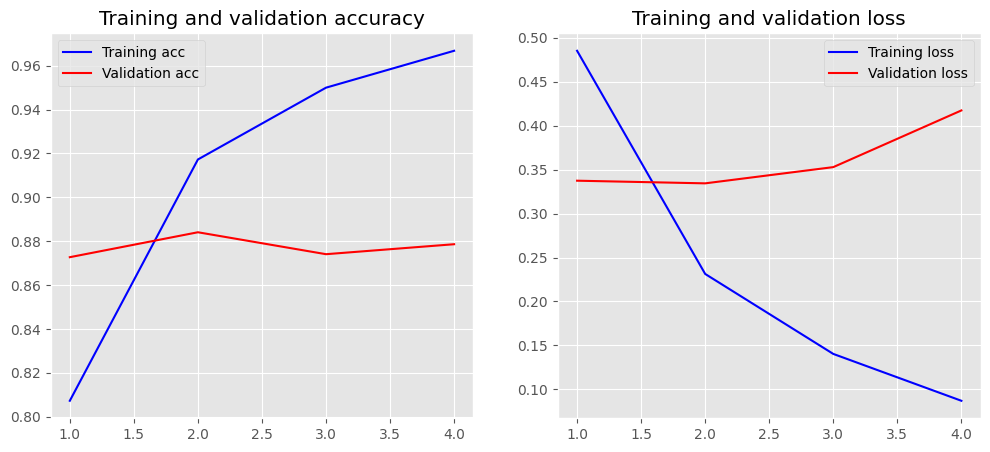

In [27]:
# history.history
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

%matplotlib inline
plot_history(history)

In [28]:
model.save('model.platinum_kelompok3')
print("Model has created!")

Model has created!


In [29]:
import re
from keras.models import load_model

input_text = """
syukurlah.
"""

def cleansing(sent):
    # Mengubah kata menjadi huruf kecil semua dengan menggunakan fungsi lower()
    string = sent.lower()
    # Menghapus emoticon dan tanda baca menggunakan "RegEx" dengan script di bawah
    string = re.sub(r'[^a-zA-Z0-9]', ' ', string)
    return string

sentiment = ['negative', 'neutral', 'positive']

text = [cleansing(input_text)]
predicted = tokenizer.texts_to_sequences(text)
guess = pad_sequences(predicted, maxlen=X.shape[1])

model = load_model('model.platinum_kelompok3')
prediction = model.predict(guess)
polarity = np.argmax(prediction[0])

print("Text: ",text[0])
print("Sentiment: ",sentiment[polarity])

1/1 [==============================] - 1s 683ms/step
Text:   syukurlah  
Sentiment:  positive


In [30]:
import re
from keras.models import load_model

input_text = """
disaat semua cowok berusaha melacak perhatian gue. loe lantas remehkan perhatian yg gue kasih khusus ke elo. basic elo cowok bego
"""

def cleansing(sent):
    # Mengubah kata menjadi huruf kecil semua dengan menggunakan fungsi lower()
    string = sent.lower()
    # Menghapus emoticon dan tanda baca menggunakan "RegEx" dengan script di bawah
    string = re.sub(r'[^a-zA-Z0-9]', ' ', string)
    return string

sentiment = ['negative', 'neutral', 'positive']

text = [cleansing(input_text)]
predicted = tokenizer.texts_to_sequences(text)
guess = pad_sequences(predicted, maxlen=X.shape[1])

model = load_model('model.platinum_kelompok3')
prediction = model.predict(guess)
polarity = np.argmax(prediction[0])

print("Text: ",text[0])
print("Sentiment: ",sentiment[polarity])

1/1 [==============================] - 1s 735ms/step
Text:   disaat semua cowok berusaha melacak perhatian gue  loe lantas remehkan perhatian yg gue kasih khusus ke elo  basic elo cowok bego  
Sentiment:  negative


In [31]:
import re
from keras.models import load_model

input_text = """
Susilo Bambang Yudhoyono Presiden RI ke 6 meminta Khofifah Emil untuk dekat dengan masyarakat
"""

def cleansing(sent):
    # Mengubah kata menjadi huruf kecil semua dengan menggunakan fungsi lower()
    string = sent.lower()
    # Menghapus emoticon dan tanda baca menggunakan "RegEx" dengan script di bawah
    string = re.sub(r'[^a-zA-Z0-9]', ' ', string)
    return string

sentiment = ['negative', 'neutral', 'positive']

text = [cleansing(input_text)]
predicted = tokenizer.texts_to_sequences(text)
guess = pad_sequences(predicted, maxlen=X.shape[1])

model = load_model('model.platinum_kelompok3')
prediction = model.predict(guess)
polarity = np.argmax(prediction[0])

print("Text: ",text[0])
print("Sentiment: ",sentiment[polarity])

1/1 [==============================] - 1s 530ms/step
Text:   susilo bambang yudhoyono presiden ri ke 6 meminta khofifah emil untuk dekat dengan masyarakat  
Sentiment:  neutral
